# SA Meteo data preparation script 
### Here we use existing `YKD-unburned.dat` and `YKD-burned.dat` to generate 5 yr input files for cases: base, no-snow, +1%$^oK$, and +20% SWdown. 
Only the last year five correspond to the cases.

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import scipy

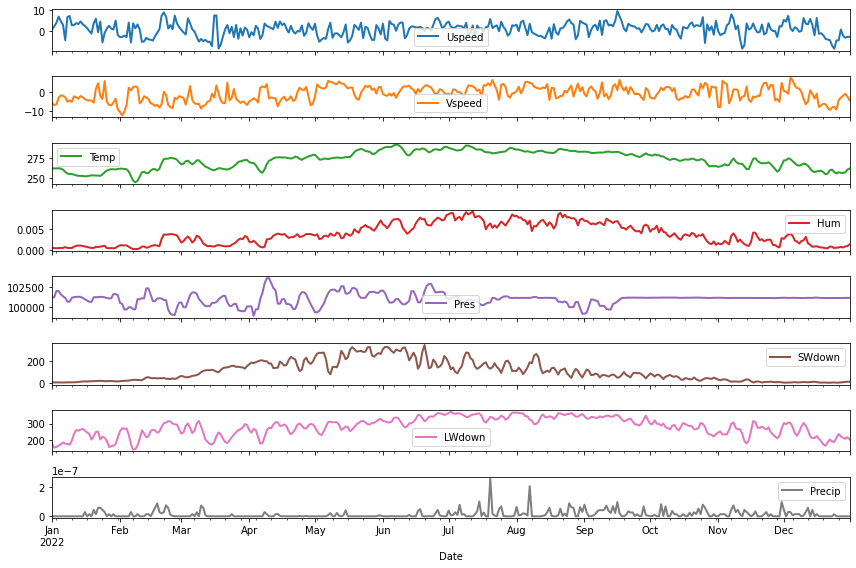

In [2]:
def read_and_plot_met_data(filename):
    df = pd.read_csv(filename)
    df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
    df.set_index('Date', inplace=True)
    df1=df.iloc[:,3:].copy()
    df1.plot(subplots=True,figsize = (12,8),linewidth=2);

    plt.tight_layout()
    
read_and_plot_met_data('YKD/LAKE/base_case/YKD-burned.dat')

In [3]:
def copy_base_case_five_times(sitename):    
    #here we merge base case df with given for the 5 hydrological years
    df = pd.read_csv('YKD/LAKE/base_case/YKD-'+sitename+'.dat')

    # copy 5 times and cut in July 1
    original = pd.concat([df, df, df, df, df, df])

    #df1.iloc[:,3:].plot(subplots=True,figsize = (12,8),linewidth=2);
    merge = pd.concat([original[181:-180]])

    #merge = merge.drop('datetime', axis=1)

    start_date = '2018-06-28'
    datetime_index = pd.date_range(start=start_date, periods=len(merge), freq='D')

    # delete last coulmn and ignore first 3 rows
    df1=merge.iloc[:,3:].copy()

    df1.index = datetime_index
    
    # Delete the last column from 'merge' and ignore the first 3 rows
    df2 = df1.iloc[3:, :].copy()

    # Set the new index with Year, Month, Day columns
    df2['Year'] = datetime_index.year[3:]  # Adjusting the index to match the row slice
    df2['Month'] = datetime_index.month[3:]  # Same adjustment
    df2['Day'] = datetime_index.day[3:]  # Same adjustment

    # Reorder the DataFrame to have Year, Month, Day as the first columns
    column_order = ['Year', 'Month', 'Day'] + [col for col in df2.columns if col not in ['Year', 'Month', 'Day']]
    df2 = df2[column_order]
    df2.reset_index(drop=True, inplace=True)
  
    return df2

burned : first year SWdown mean: 107.34741761421303
burned : last year SWdown mean: 128.81690113705562
burned : first year Temp mean: -0.3052303066262425
burned : last year Temp mean: 2.4232173903074568
---------
unburned : first year SWdown mean: 110.58882501267234
unburned : last year SWdown mean: 132.7065900152068
unburned : first year Temp mean: 0.227210299616047
unburned : last year Temp mean: 2.960982402612217
---------


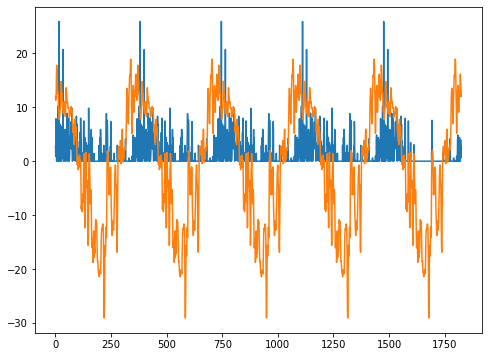

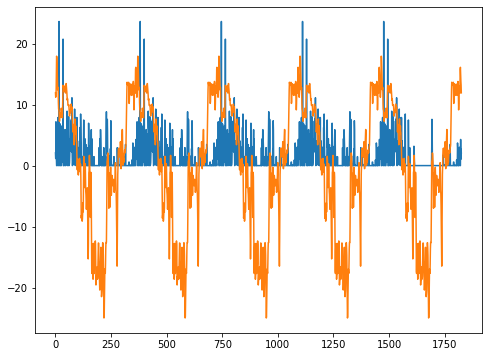

In [4]:
sitenames=['burned','unburned']
for sitename in sitenames:
    df1=copy_base_case_five_times(sitename)
    df1.to_csv('prepped/YKD-'+sitename+'-5yr.dat', index=False)
    # Select the index of the last 366 elements
    last_366_index = df1.index[-366:]
    last_366_index
    #remove winter precip for Tair<=0C
    df1.loc[df1.index.isin(last_366_index) & (df1['Temp'] <= 273.15), 'Precip'] = 0
    df1.to_csv('prepped/YKD-'+sitename+'-no-snow-5yr.dat', index=False)

    plt.figure(figsize=(8,6))
    plt.plot(df1['Precip'].values*10**8)
    plt.plot(df1['Temp'].values-273.15)

    #increase SWdown by 20%
    df1=copy_base_case_five_times(sitename)
    df1['SWdown'][-366:]=df1['SWdown'][-366:]+df1['SWdown'][-366:]*.2
    df1.to_csv('prepped/YKD-'+sitename+'-swin20pct-5yr.dat', index=False)
    print(sitename, ': first year SWdown mean:',df1['SWdown'].iloc[:366].mean())
    print(sitename, ': last year SWdown mean:',df1['SWdown'].iloc[-366:].mean())

    #increase Temp by 0.01%
    df1=copy_base_case_five_times(sitename)
    df1['Temp'][-366:]=df1['Temp'][-366:]+df1['Temp'][-366:]*.01
    df1.to_csv('prepped/YKD-'+sitename+'-tplus1pct-5yr.dat', index=False)
    print(sitename, ': first year Temp mean:',df1['Temp'].iloc[:366].mean()-273.15)
    print(sitename, ': last year Temp mean:',df1['Temp'].iloc[-366:].mean()-273.15)
    print('---------')


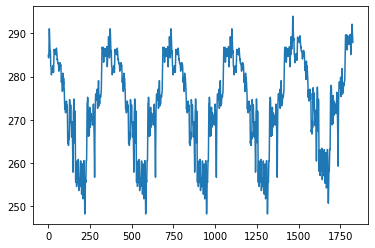

In [5]:
plt.plot(df1['Temp'].values);